# Big Mart Sales Predictions

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the file to preform the required tasks
df=pd.read_csv(r"C:\Users\kadah\Downloads\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#for checking the data types of attributes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#check unique values in datset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset

In [7]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
# fill the missing values
item_weight_mean = df.pivot_table(values="Item_Weight", index = "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
mv = df['Item_Weight'].isnull()
mv

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
# percentage of null values in dataset
df.isnull().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

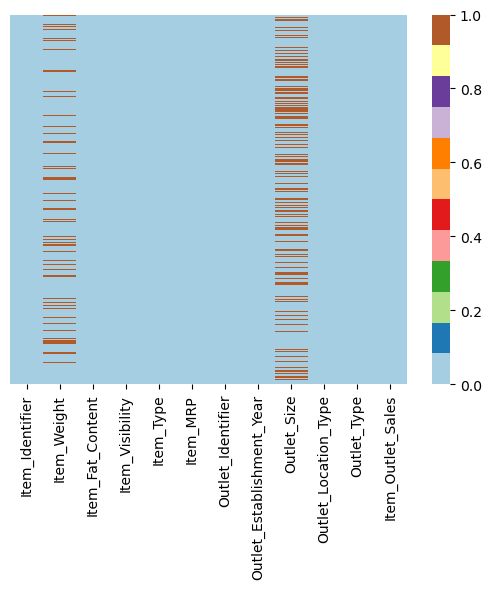

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired") 

In [15]:
# mean value of 'Item weight' column
df['Item_Weight'].mean()

12.857645184135976

In [16]:
# filling the missing values in 'Item_Weight' column with 'Mean' value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
# Replacing the missing values in 'outlet_size' with mode
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [19]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [20]:
mv2 = df['Outlet_Size'].isnull()

In [21]:
mv2

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [22]:
df.loc[mv2, 'Outlet_Size'] = df.loc[mv2, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [23]:
#final check for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

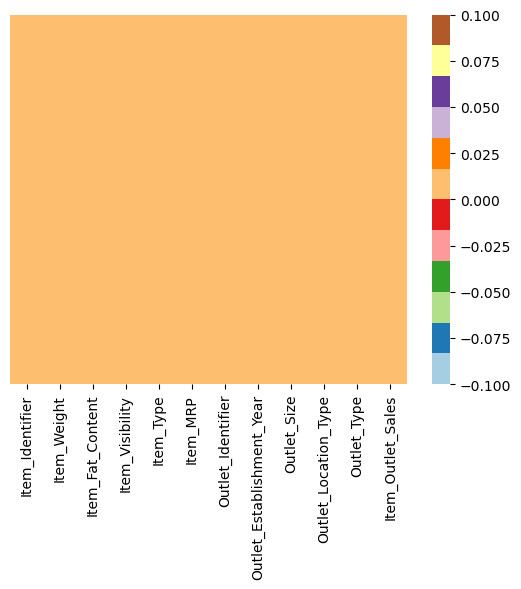

In [24]:
# To check the missing values on a heatmap
sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired") 

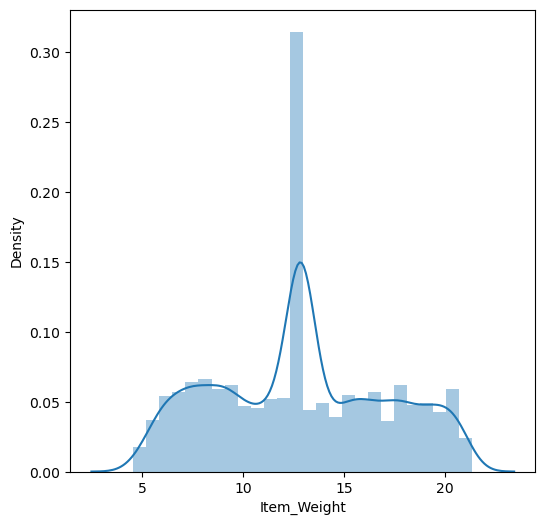

In [25]:
#Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

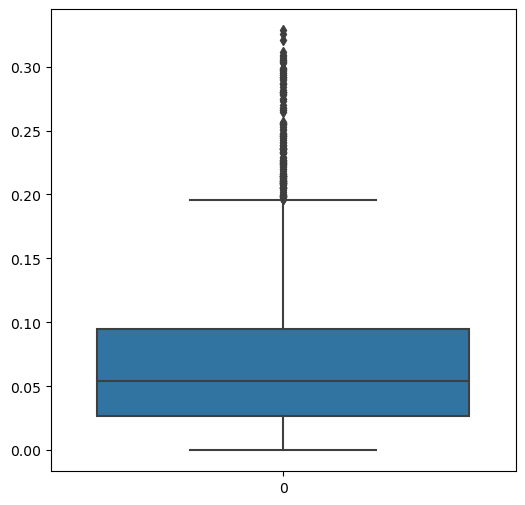

In [26]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.boxplot(df['Item_Visibility'])
plt.show()

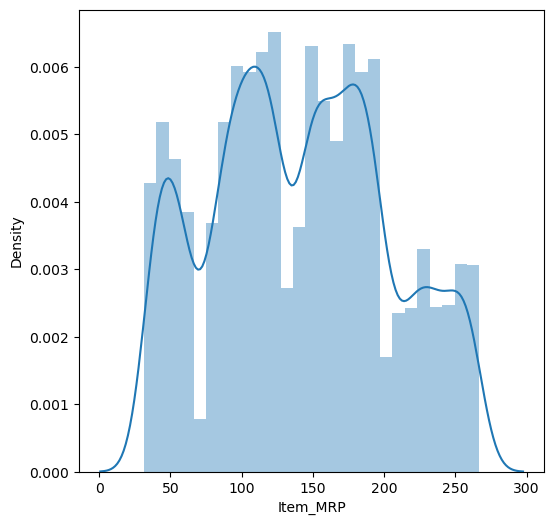

In [27]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

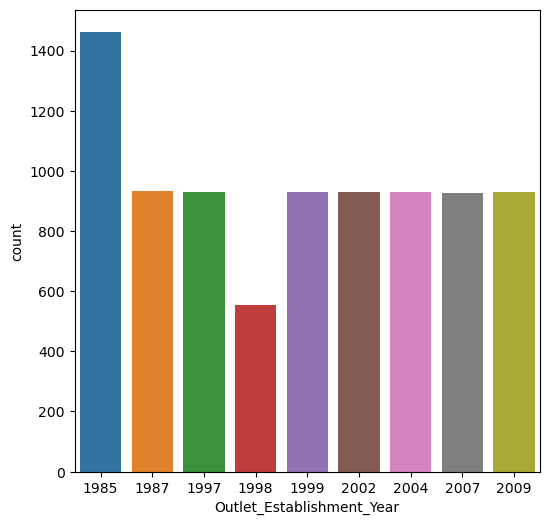

In [28]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

# Categorical Features 

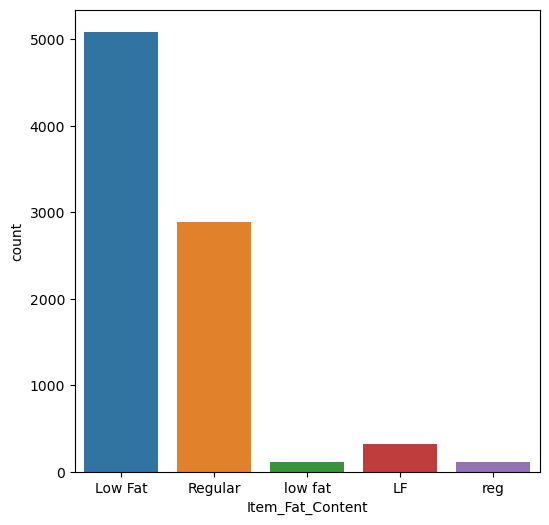

In [29]:
# Checking the total number of fat content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

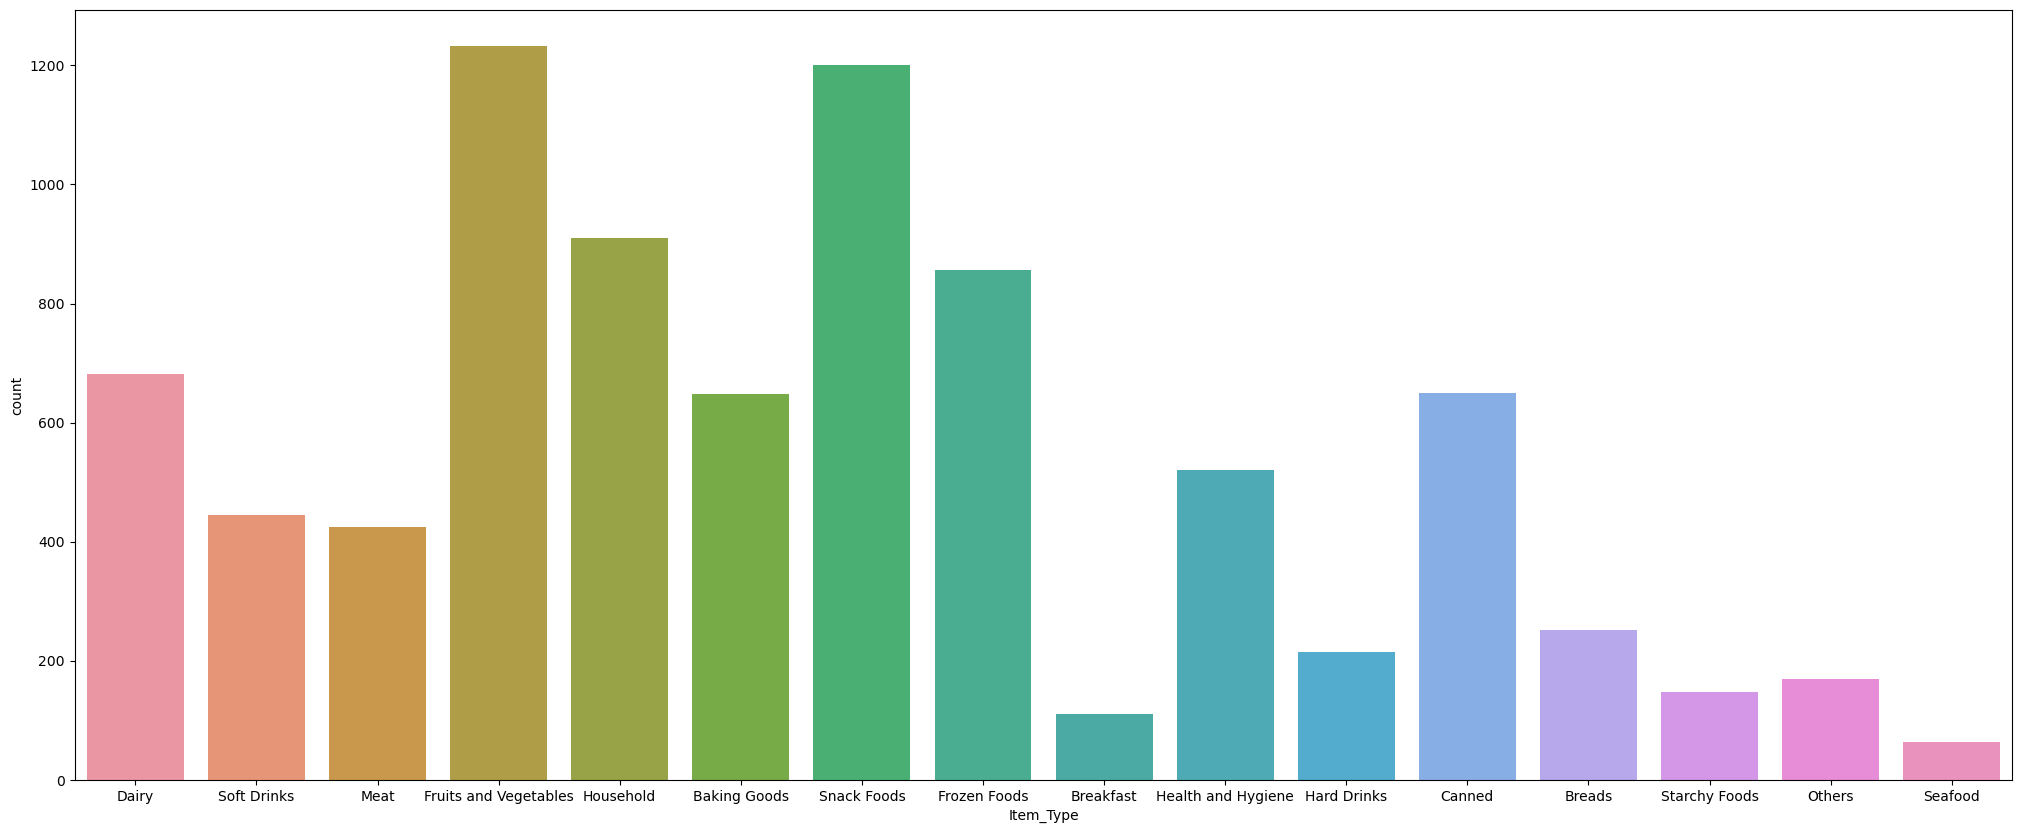

In [30]:
# Item_Type
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type',data=df)
plt.show()

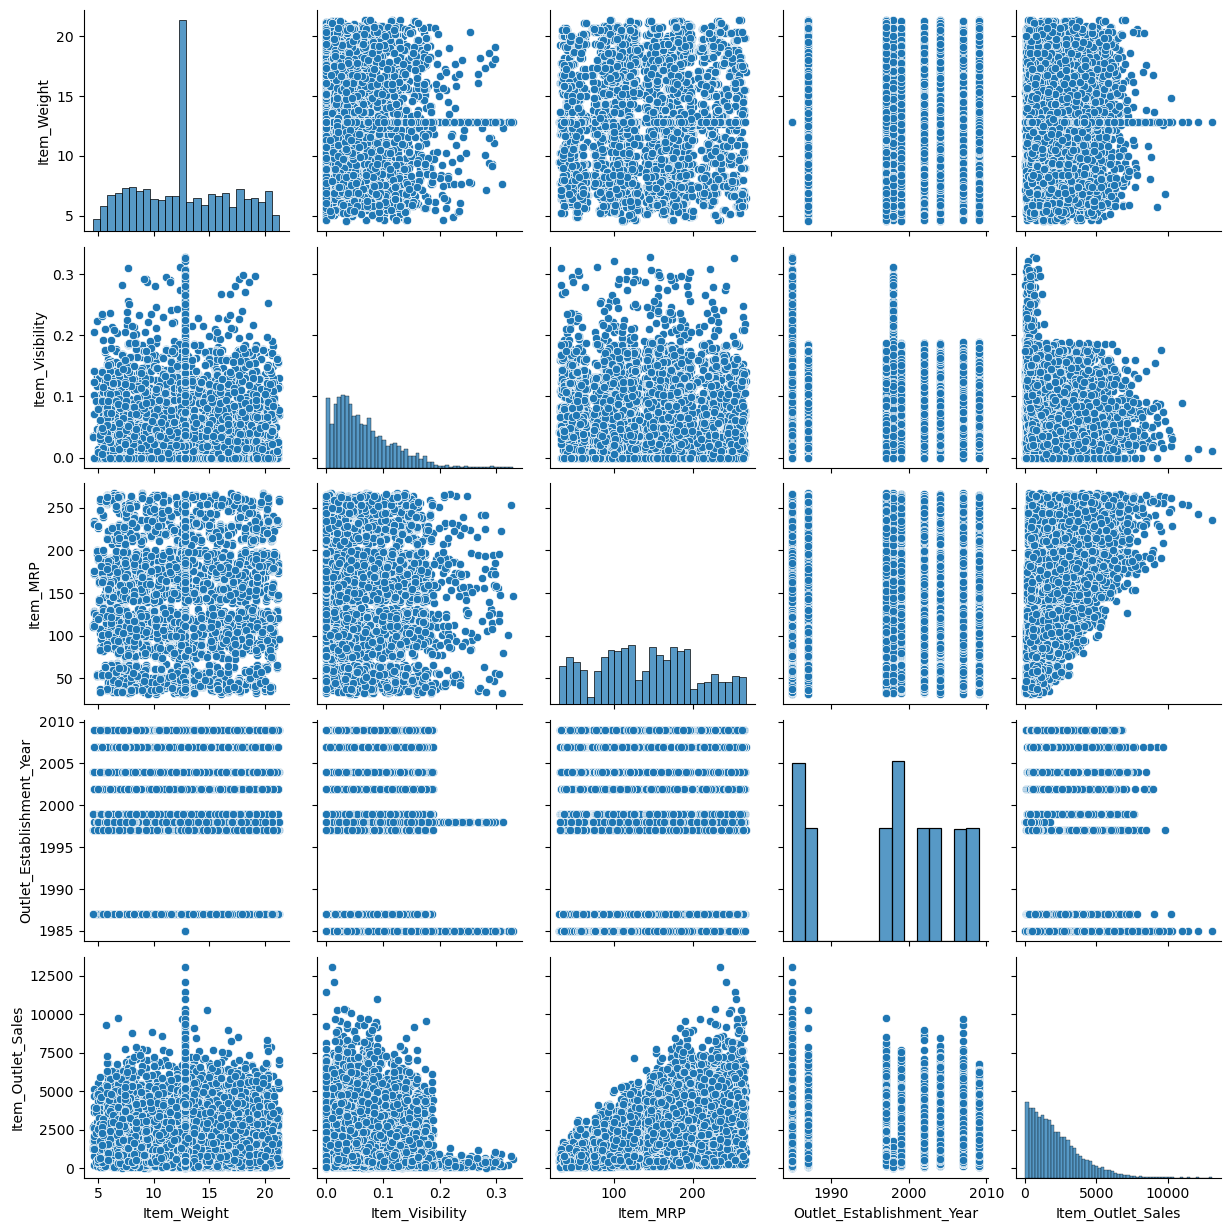

In [31]:
sns.pairplot(df)

<Axes: ylabel='Item_MRP'>

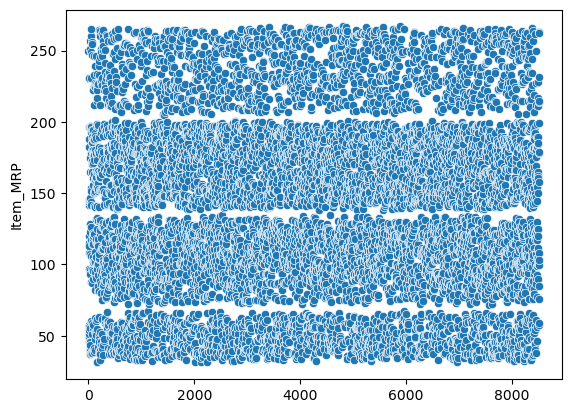

In [32]:
sns.scatterplot(df.Item_MRP)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

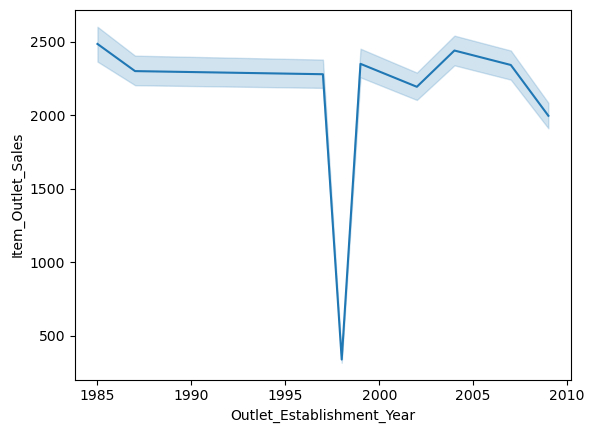

In [33]:
sns.lineplot(x='Outlet_Establishment_Year',y="Item_Outlet_Sales",data=df)

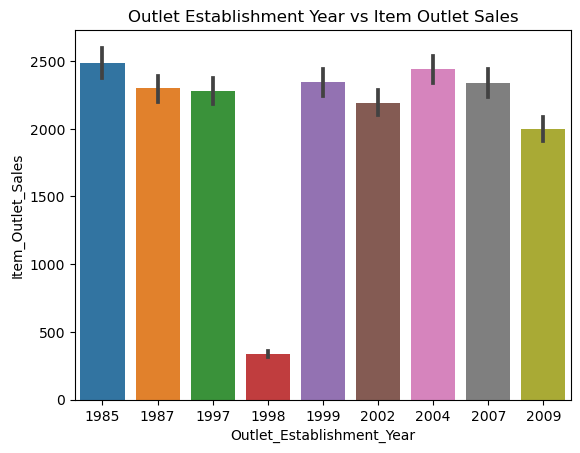

In [34]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data=df, orient='v')
plt.title ('Outlet Establishment Year vs Item Outlet Sales')
plt.show()

In [35]:
a=df.groupby("Outlet_Type")["Outlet_Type"].count()

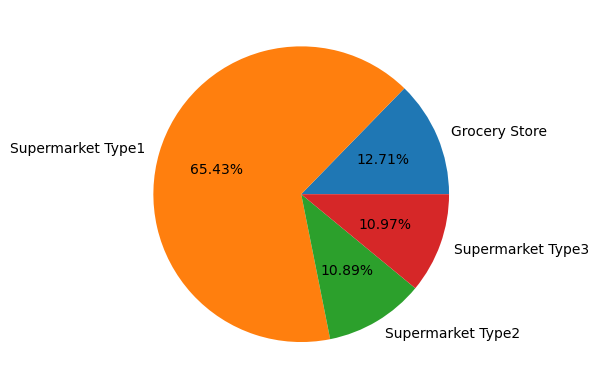

In [36]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Count'>

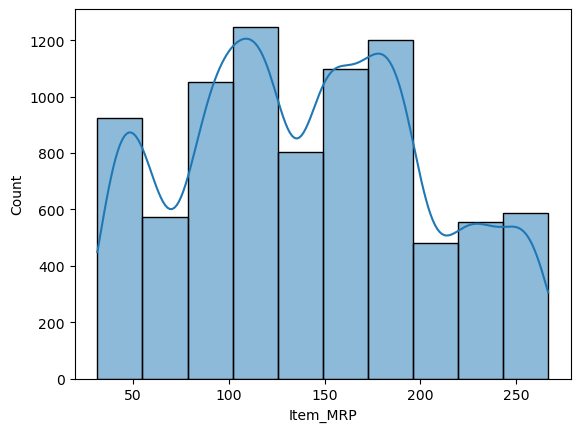

In [37]:
sns.histplot(df["Item_MRP"],bins=10,kde=True)

In [38]:
x=df.sample(500)

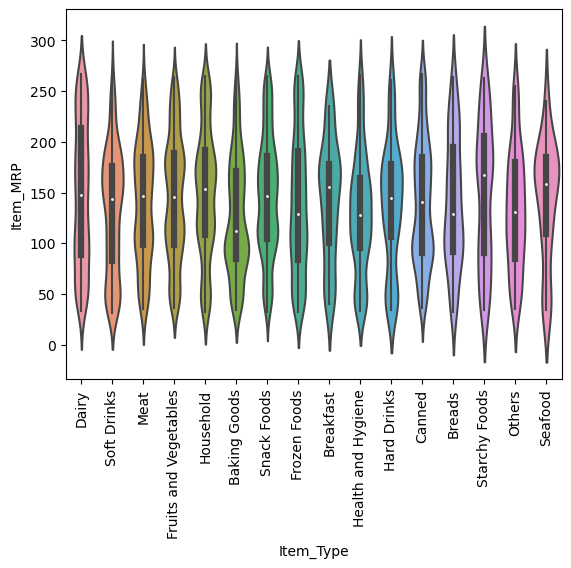

In [39]:
sns.violinplot(x="Item_Type",y="Item_MRP",data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Item_Visibility'>

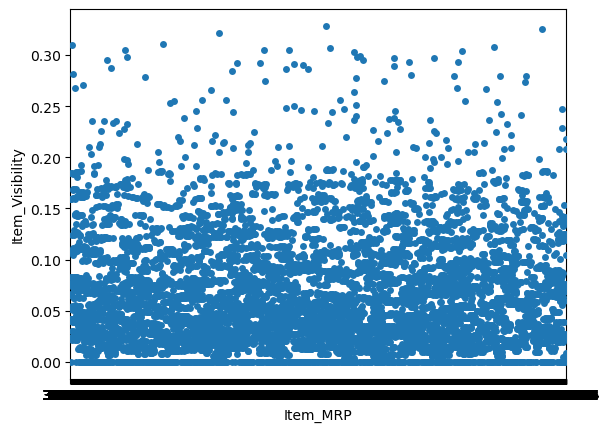

In [40]:
sns.stripplot(x="Item_MRP",y="Item_Visibility",data=df)

# Data Preprocessing

In [41]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,4710.5350


In [42]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
df.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [44]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Outlier Detection and Removal

In [45]:
from scipy import stats
z_scores=stats.zscore(df["Item_Outlet_Sales"])
z_score_outliers=(z_scores<-3)|(z_scores>3)

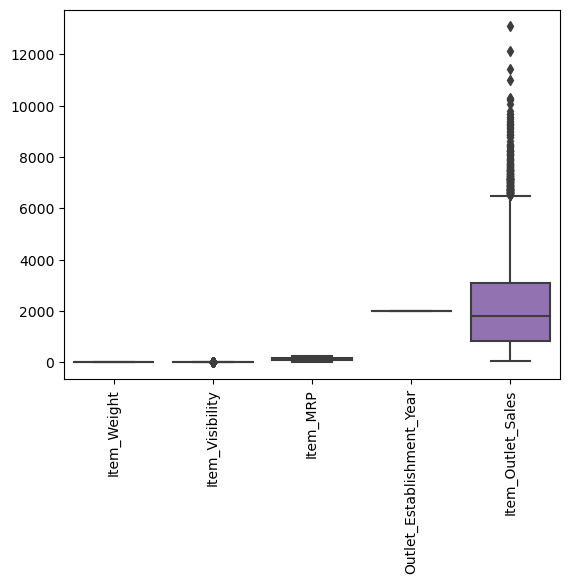

In [46]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [47]:
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
130            FDY25    12.857645          Low Fat         0.033810   
145            FDP16    18.600000          Low Fat         0.039356   
276            FDY55    16.750000          Low Fat         0.081253   
304            DRE60     9.395000          Low Fat         0.159658   
333            FDN58    12.857645          Regular         0.056597   
...              ...          ...              ...              ...   
7930           FDP15    12.857645          Low Fat         0.083536   
8039           FDY55    16.750000          Low Fat         0.081485   
8201           FDO03    12.857645          Regular         0.036704   
8245           FDU55    16.200000          Low Fat         0.035967   
8447           FDS26    20.350000          Low Fat         0.089975   

                  Item_Type  Item_MRP Outlet_Identifier  \
130                  Canned  180.5976            OUT027   

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
df.shape

(8523, 12)

In [50]:
x=(z_scores>-3)&(z_scores<3)

In [51]:
#making a new variable df_1
df_1=df[x] 

In [52]:
print(df_1)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [53]:
df_1.shape

(8433, 12)

# Label Encoding

In [54]:
encoder = LabelEncoder()

In [55]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])




In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [57]:
df.drop('Outlet_Size',axis = 1, inplace = True)

In [58]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,2,2,1845.5976


# Linear Regression

In [59]:
import joblib

In [60]:
df_1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [61]:
X = df.drop('Item_Outlet_Sales',axis=1)
Y = df['Item_Outlet_Sales']
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [62]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [63]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [64]:
print(X.shape,X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBRegressor

In [67]:
regressor = XGBRegressor()

In [68]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [70]:
print(model.intercept_)

2548.699721084886


In [71]:
print(model.coef_)

[-1.25879568e-02 -3.49820232e+00  3.58104336e+01 -1.62414542e+03
  2.45010060e-01  1.56123258e+01  5.30005408e+01 -1.81226674e+00
 -7.22979158e+01  8.49489351e+02]


In [72]:
mae = mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error',mae)
print('Mean Squared Error',mse)
print('Root Mean Absolute Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 948.0180694286282
Mean Squared Error 1584175.4892109602
Root Mean Absolute Error 1258.6403335389186
R2 Score 0.48683603806519316


In [91]:
#adjusted_r2=1-[(1-r2)*(n-1)/(n-k-1)] -- formula
adjusted_r2=1-((1-0.43205)*(822-1)/(822-11-1))
print('adjusted r2 is :',adjusted_r2)

adjusted r2 is : 0.42433709876543213


In [74]:
y_mean=np.mean(Y_test)
SSR = np.sum((y_pred - y_mean) ** 2)
print('SSR :',SSR)

SSR : 2511095349.1899443


In [75]:
SST = np.sum((Y_test - y_mean) ** 2)
print('SST :', SST)

SST : 5263462381.342805


In [76]:
SSE=SST-SSR
print ('SSE :', SSE)

SSE : 2752367032.1528606


In [77]:
b=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})
b

,Actual,Predicted
1112,1544.6560,2583.027514
1751,6404.9960,3663.003223
7648,1070.6064,1192.141842
7362,369.5190,518.623766
5332,101.2016,692.864434
...,...,...
3503,4255.7936,3481.238686
975,1222.4088,653.506100
6190,1551.9798,2116.557177
32,3068.0064,4556.664534


In [78]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso

In [79]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=5)

In [80]:
lasso_model=Lasso(alpha=1.0)
lassso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=5)

In [81]:
ridge_model=Ridge(alpha=1.0)
ridge_scores=cross_val_score(ridge_model,X_train,Y_train,cv=5)

In [82]:
lr_model.fit(X_train,Y_train)
lr_prediction =lr_model.predict(X_test)
lr_mae =mean_absolute_error(Y_test,lr_prediction)
lr_mse =mean_squared_error(Y_test,lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(Y_test,lr_prediction)
print('Linear mae',lr_mae)
print('Linear mse',lr_mse)
print('Linear rmse',lr_rmse)
print('Linear r2',lr_r2)

Linear mae 948.0180694286282
Linear mse 1584175.4892109602
Linear rmse 1258.6403335389186
Linear r2 0.48683603806519316


In [83]:
lasso_model.fit(X_train,Y_train)
lasso_prediction =lasso_model.predict(X_test)
lasso_mae =mean_absolute_error(Y_test,lasso_prediction)
lasso_mse =mean_squared_error(Y_test,lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(Y_test,lr_prediction)
print('Lasso mae',lasso_mae)
print('Lasso mse',lasso_mse)
print('Lasso rmse',lasso_rmse)
print('Lasso r2',lasso_r2)

Lasso mae 948.9512080916995
Lasso mse 1586010.1016942128
Lasso rmse 1259.3689299384089
Lasso r2 0.48683603806519316


In [84]:
ridge_model.fit(X_train,Y_train)
ridge_prediction =ridge_model.predict(X_test)
ridge_mae =mean_absolute_error(Y_test,ridge_prediction)
ridge_mse =mean_squared_error(Y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(Y_test,ridge_prediction)
print('ridge mae',ridge_mae)
print('ridge mse',ridge_mse)
print('ridge rmse',ridge_rmse)
print('ridge r2',ridge_r2)

ridge mae 948.179060901153
ridge mse 1584473.1605625735
ridge rmse 1258.7585791415975
ridge r2 0.48673961300926427


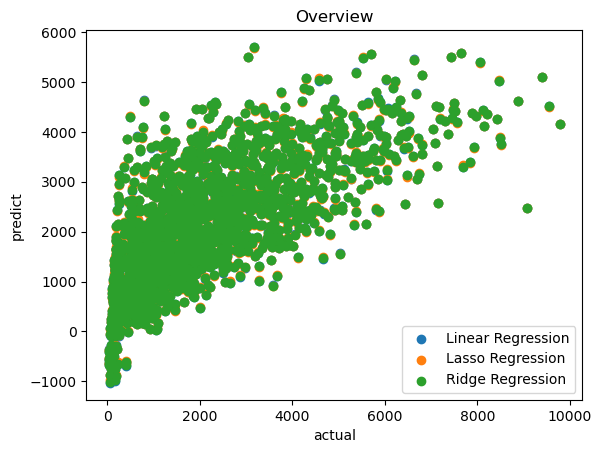

In [85]:
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Overview')
plt.legend()

# Robust Techniques

In [86]:
# MM estimator:huberregression
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X_test)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_scaled, Y_test)
huber_prediction = huber.predict(X_scaled)
huber_mae =mean_absolute_error(Y_test,huber_prediction)
huber_mse =mean_squared_error(Y_test,huber_prediction)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(Y_test,huber_prediction)
print('huber mae:',huber_mae)
print('huber mse:',huber_mse)
print('huber rmse:',huber_rmse)
print('huber r2:',huber_r2)

huber mae: 936.8405932903555
huber mse: 1588608.13535079
huber rmse: 1260.3999902216717
huber r2: 0.4854001654169532


In [87]:
# MM estimate: RANSAC regression
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
ransac = RANSACRegressor()
mm= ransac.fit(X_test, Y_test)
mm_estimate_coeff = ransac.estimator_.coef_
mm_estimate_intercept = ransac.estimator_.intercept_
mm_prediction = ransac.predict(X_test)
print("MM Estimate Coefficients:", mm_estimate_coeff)
print("MM Estimate Intercept:", mm_estimate_intercept)
mm_mae =mean_absolute_error(Y_test,mm_prediction)
mm_mse =mean_squared_error(Y_test,mm_prediction)
mm_rmse = np.sqrt(mm_mse)
mm_r2 = r2_score(Y_test,huber_prediction)
print('mm mae:',mm_mae)
print('mm mse:',mm_mse)
print('mm rmse:',mm_rmse)
print('mm r2:',mm_r2)

MM Estimate Coefficients: [ 4.50985107e-01 -3.94504809e+01  4.47225749e+02 -9.22388252e+03
 -5.10842496e+01  1.12388666e+01  3.22389679e+02 -8.56001866e+00
  1.16799558e+03 -2.03180958e+02]
MM Estimate Intercept: 15959.384728810412
mm mae: 1128.007235049342
mm mse: 2187607.678993882
mm rmse: 1479.0563474708738
mm r2: 0.4854001654169532


In [88]:
# lts estimate
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

ransac.fit(X_test, Y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(Y_test,lts_prediction)
lts_mse =mean_squared_error(Y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(Y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

LTS Estimate Coefficients: [-4.59314997e-01 -2.03052359e+01 -8.32817522e+01 -1.49388520e+03
 -8.02456530e+01  9.86583613e+00 -7.68519291e+00  3.09472470e-01
 -3.46814515e+02  1.23807348e+03]
LTS Estimate Intercept: 122.06281527910801
lts mae: 1047.6943929262047
lts mse: 2022746.6788396488
lts rmse: 1422.2329903499106
lts r2: 0.4854001654169532


In [89]:
# theil sen regressor
from sklearn.linear_model import TheilSenRegressor

# Create a Theil-Sen estimator model
theil_sen = TheilSenRegressor()

# Fit the model to the data
theil_sen.fit(X_test, Y_test)

# Get the Theil-Sen estimate of the coefficients
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(Y_test,ts_prediction)
ts_mse =mean_squared_error(Y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(Y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

Theil-Sen Estimate Intercept: 30719.418408522135
Theil-Sen Estimate Coefficient: 0.019559149819942667
ts mae: 946.6266852055652
ts mse: 1576985.2492358827
ts rmse: 1255.7807329450004
ts r2: 0.4891651815584501
